In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input,Dense,Flatten,MaxPool2D,MaxPool1D,Activation,LeakyReLU,LSTM,BatchNormalization,Dropout,Conv2D,Conv1D,Lambda
from keras.models import Model,load_model
from keras.optimizers import Adam
import keras.backend as K
import h5py
import keras
from keras.constraints import max_norm
import utils

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
feat_file='/content/gdrive/My Drive/EE5611_project_features/base_scrnn_features.h5'
fid=h5py.File(feat_file,'r');
x_tr = fid['x_tr']
y_tr = fid['y_tr']
x_ts=fid['x_ts']
y_ts=fid['y_ts']
snr_ts = np.array(fid['snr_ts'])

In [0]:
def baseline_scrnn():

	# Dropout and regularization not added. Make modifications to add those layers
	# change the hyperparameter values as mentioned in the cited paper

	inputs = Input((128,2,))
	l = BatchNormalization()(inputs)
	# l = Lambda(lambda t: K.expand_dims(t, -2))(l)
	l = Conv1D(filters=128,kernel_size=5,activation='relu')(l)
	l = MaxPool1D(3)(l)
	l = Conv1D(filters=128,kernel_size=5,activation='relu')(l)
	# l = Lambda(lambda t: K.squeeze(t, -2))(l)
	l = LSTM(128,return_sequences=True,activation='relu',unroll=True)(l)
	l = Dropout(0.2)(l)
	l = LSTM(128,return_sequences=True,activation='relu',unroll=True)(l)
	l = Dropout(0.2)(l)
	l = Flatten()(l)
	outputs = Dense(11,activation='softmax',kernel_constraint = max_norm(2.))(l)

	model = Model(inputs,outputs)
	model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001) ,metrics=['accuracy'])
	model.summary()
	return model

In [5]:
model_dir = '/content/gdrive/My Drive/EE5611_project_features/SCRNN_models/Baseline_SCRNN_models/'
m_baseline_scrnn = baseline_scrnn()
checkpoint = keras.callbacks.ModelCheckpoint(model_dir+ "model_epoch-{epoch:02d}_val_acc-{val_accuracy:.2f}.h5", monitor='val_accuracy', verbose=2, save_best_only=False, save_weights_only=False, mode='auto', period=1)
history = m_baseline_scrnn.fit(x=x_tr,
       y=y_tr,
       validation_data=[x_ts,y_ts],
       batch_size=400,
       epochs=100,
       shuffle='batch',
       callbacks = [checkpoint],
       verbose=1)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 2)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 2)            8         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 124, 128)          1408      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 41, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 37, 128)           82048     
_________________________________________________________________
lstm_1 (LSTM)                (None, 37, 128)           131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 128)           0   

Baseline scrnn


acc_baseline_scrnn
 [0.37307072, 0.479798, 0.5239546, 0.5334798, 0.54565656, 0.55269194, 0.55879796, 0.56436366, 0.56808585, 0.5730252, 0.57646465, 0.5815707, 0.5865808, 0.59113634, 0.595601, 0.5984798, 0.6039596, 0.6079394, 0.6123737, 0.61539394, 0.61974245, 0.6230101, 0.62545455, 0.62925756, 0.63191414, 0.63321215, 0.63726765, 0.6392273, 0.6422778, 0.64372724, 0.6472222, 0.6487525, 0.6520101, 0.65395457, 0.6569141, 0.65853536, 0.66086364, 0.66295457, 0.66513634, 0.6683687, 0.67050505, 0.67187375, 0.6738535, 0.67652524, 0.6785859, 0.68019193, 0.6825303, 0.68333334, 0.68428284, 0.6762626, 0.6843131, 0.6890202, 0.6918535, 0.693404, 0.6953586, 0.6985707, 0.69889396, 0.70053536, 0.7014798, 0.7033535, 0.70297474, 0.70673233, 0.7045202, 0.7074798, 0.679399, 0.7085303, 0.7083081, 0.7121414, 0.71159595, 0.71177274, 0.71203536, 0.7191263, 0.71832323, 0.7202374, 0.709995, 0.7221111, 0.72468686, 0.72565657, 0.69447476, 0.72261614, 0.7273485, 0.7289798, 0.73187375, 0.7320909, 0.7

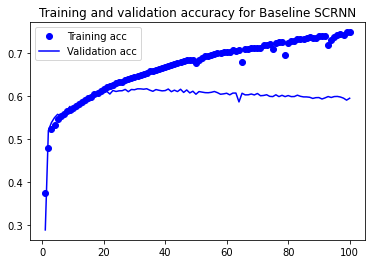

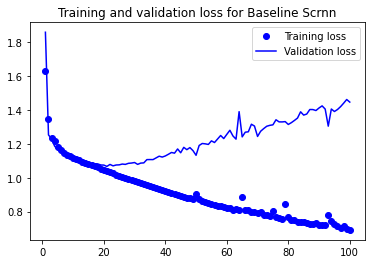

In [6]:
acc_baseline_scrnn = history.history['accuracy']
val_acc_baseline_scrnn = history.history['val_accuracy']
loss_baseline_scrnn = history.history['loss']
val_loss_baseline_scrnn = history.history['val_loss']
epochs = range(1, len(acc_baseline_scrnn) + 1)

print('===================================================')
print('Baseline scrnn\n\n')
print('acc_baseline_scrnn\n',acc_baseline_scrnn)
print('val_acc_baseline_scrnn\n',val_acc_baseline_scrnn)
print('loss_baseline_scrnn\n',loss_baseline_scrnn)
print('val_loss_baseline_scrnn\n',val_loss_baseline_scrnn)

plt.plot(epochs, acc_baseline_scrnn, 'bo', label='Training acc')
plt.plot(epochs, val_acc_baseline_scrnn, 'b', label='Validation acc')
plt.title('Training and validation accuracy for Baseline SCRNN')
plt.legend()
plt.figure()
plt.plot(epochs, loss_baseline_scrnn, 'bo', label='Training loss')
plt.plot(epochs, val_loss_baseline_scrnn, 'b', label='Validation loss')
plt.title('Training and validation loss for Baseline Scrnn')
plt.legend()
plt.show()



SNR: -20dB, Validation Accuracy: 9.636363636363637


             Classification Report
              precision    recall  f1-score   support

           0       0.05      0.01      0.02       100
           1       0.00      0.00      0.00       100
           2       0.12      0.02      0.03       100
           3       0.21      0.10      0.14       100
           4       0.03      0.01      0.02       100
           5       0.18      0.02      0.04       100
           6       0.09      0.87      0.17       100
           7       0.10      0.01      0.02       100
           8       0.10      0.01      0.02       100
           9       0.10      0.01      0.02       100
          10       0.00      0.00      0.00       100

    accuracy                           0.10      1100
   macro avg       0.09      0.10      0.04      1100
weighted avg       0.09      0.10      0.04      1100


             Confusion Matrix
[[ 1  0  2  0  2  1 90  0  2  2  0]
 [ 2  0  3  2  1  0 89  1  1  0

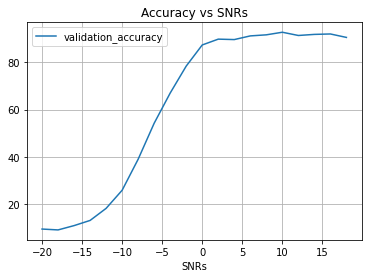

In [7]:
# baseline scrnn model evaluation
baseline_scrnn_model = utils.evaluate_model('/content/gdrive/My Drive/EE5611_project_features/SCRNN_models/Baseline_SCRNN_models/','model_epoch-34_val_acc-0.62.h5',np.array(x_ts),np.array(y_ts),snr_ts)
print(baseline_scrnn_model)